<h1> Market Segmentation </h1>

<p>For the following dataset, please determine the best market segmentations for the data below - make sure to plot and explain your results when possible. The dataset is comprised of Satisfaction (discrete) and Loyalty (continuous). Please explain any considerations/assumptions you make as well as any conclusions you draw from the data. Think about these segmentations and think about what other kinds of data that might also lead to a more insightful analysis. Please include all things you tried - both what worked, and what didn't and why (very important).
Please upload your results to Github and email it back to us. Thank you.</p>

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
market_data = pd.read_csv('market_data.csv')

In [74]:
market_data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


#### The data given just contains two features, Satisfaction and Loyalty, which I have assumed to belong to an organization vested in analysing their customer retention in order to drive sales/profits. 
#### Since customer acquisition is way more expensive and time consuming as compared to customer retention, since it involves a lot of resources, it is important for an organization to increase customer loyalty instead.

#### So the following visualizations and analysis have been carried out to understand the relation between Customer Satisfaction and Loyalty, in order to reach insightful conclusions. 

In [75]:
# Number of records - Assuming them to be equal to the number of customers
market_data['Satisfaction'].shape

(480,)

In [76]:
# Different Satisfaction segments
set(market_data['Satisfaction'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [77]:
# range of loyalty in general
max_loyalty = max(market_data['Loyalty'])
min_loyalty = min(market_data['Loyalty'])
print(max_loyalty)
print(min_loyalty)

1.38
-1.69


### Assumption about loyalty and satisfaction
Since the range of the loyalty is from -1.69 to 1.38, I have assumed anything above 0 to mean that the customer retention is good and below 0 to mean that the customer is not loyal

Satisfaction in general, has been considered to imply positive as long as it is above 5, else it has a negative connotation.

## Satisfaction, Loyalty Matrix

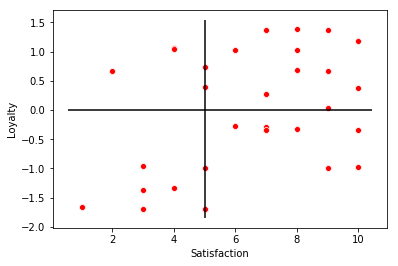

In [78]:
ax = sns.scatterplot(data=market_data,x='Satisfaction',y='Loyalty',color='red')
ax.hlines(0,*ax.get_xlim(),colors='black')
ax.vlines(5,*ax.get_ylim(),colors='black')

#### One would expect the loyalty to increase as the satisfaction increases, or the satisfaction to increase simultaneously with the loyalty, but as can be seen from the above graph, the same is not applicable here. They do not have a linear relationship.

#### So taking inspiration from Loyalty Driver Matrices, I have considered the above scatter plot between Loyalty and Satisfaction in 4 sections : 
1.The top right segment is the sweet spot, with a high customer retention and satisfaction rate<br>
2.The bottom left segment is the critical zone, with a lower loyalty as well as customer satisfaction. It is important for the organization to understand the possible drivers for this.<br>
3rd and 4th segments signify areas of improvement, since either of the feaures are in the positive side, and measures can be taken in order to support the numbers.

## Spread of loyalties

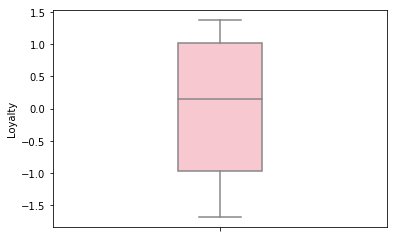

In [79]:
sns.boxplot(data=market_data,y='Loyalty',color='pink',width=0.25)

#### The above boxplot just signifies the range of loyalties in the entire dataset.
The upper, lower bounds are almost the same, the quartiles cover nearly the same numeric range as well. 
Through this visual, I wanted to gather an understanding of the spread of loyalties, and see how many of the customers in general are loyal to the organization.
As can be observed, the count of customer loyalty is slighly less than the non retention, implying that the organization is unable to retain half the customers it is acquiring and should invest in measures in order change the scenario.

In [80]:
loyalty_sum = market_data.groupby(['Satisfaction']).sum()
satisfaction_count = market_data.groupby(['Satisfaction']).count()
loyalty_mean = market_data.groupby(['Satisfaction']).mean()

## Relationship between customer satisfaction and loyalty

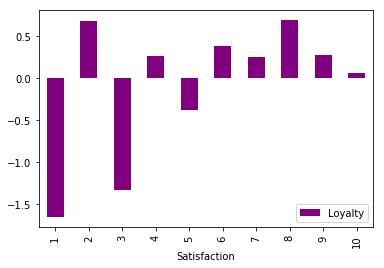

In [81]:
loyalty_mean.plot(kind='bar',color='purple')

Through the above visualization I wanted to get an understanding of what the average Loyalty is per Satisfaction group, and as can be seen from above, the value for higher Satisfaction groups is understandbly high , barring the exception of Satisfaction group 2

From the visualization below, the number of customers per Satisfaction group has been plotted, to understand how many of them belong to which Satisfaction group.<br>
As can be seen, quite a lot belong to the higher Satisfaction groups, signifying that the organization is doing pretty great in terms of customer satisfaction

## Net customer satisfaction

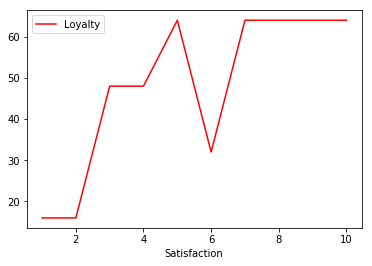

In [82]:
satisfaction_count.plot(kind='line',color='red')

## Spread of loyalty per Satisfaction group

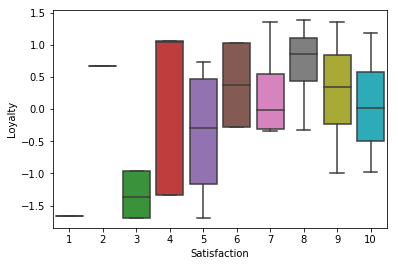

In [83]:
sns.boxplot(x='Satisfaction',y='Loyalty',data=market_data)

### Observation
1. For Satisfaction group 1 - 4, the Loyalty lower limit is almost similar <br>
2. Whereas for Satisfaction group 6 - 10, the upper limit is similar

Satisfaction group 2 stands out from this analysis, implying an anamoly
### High satisfaction score => loyalty high too

## Positve and negative loyalty per Satisfaction group

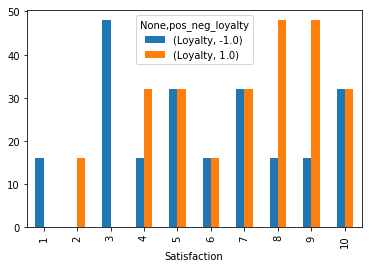

In [84]:
market_data['pos_neg_loyalty'] = np.sign(market_data['Loyalty'])
market_data.groupby(['Satisfaction','pos_neg_loyalty']).count().unstack().plot(kind='bar')

Through the above visualisation, the aim was to find out the positive and negative Loyalty count per Satisfaction group, to reach the understanding of how spread the data is within each group<br>
As can be seen, the positive Loyalty count for higher Satisfaction groups is either more or equal to the negative count.<br>
From this, it can be analyzed that the customer with higher Satisfaction groups, tend to have positive Loyalty only, bringing to the sub-conclusion, that the the segmentation of customers can be considered from Satisfaction group 5 onwards

## Spread of loyalty for positive and negative loyalty for each satisfaction group

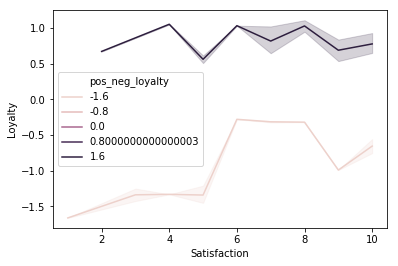

In [108]:
sns.lineplot(data=market_data, x='Satisfaction',y='Loyalty',hue='pos_neg_loyalty')

In this final visualization, I wanted to understand distribution of the Loyalty score itself, unlike the previous analysis, where just the count is considered.<br>
Through this, it can be observed that again Loyalty for Satisfaction groups 5 and above tends to be on the positive side.<br>
Even though there are negative loyalties, they often tend to stick close to zero.<br>
For groups 4 and below, even though there are positive Loyalties, the negative score of the Loyalties tends to overweigh the same.

## Additional data for further insights
#### 1. Customer demographic ( characteristics ) - to understand what kinds of customers are satisfied and loyal so that the organization can focus on similar people to increase profits
e.g age, gender, location, income etc <br>
Through this, it would become easier to understand the satisfaction drivers, so that a proper analysis of what kinds of customers are true to the brand

## Percent distribution of Satisfaction and Loyalty

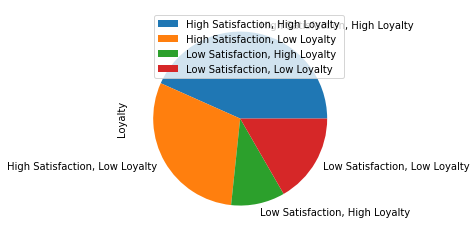

In [106]:
segment = []
for row in market_data.itertuples():
    if row.Satisfaction>=5 and row.Loyalty>=0:
        segment.append("High Satisfaction, High Loyalty")
    elif row.Satisfaction>=5 and row.Loyalty<0:
        segment.append("High Satisfaction, Low Loyalty")
    elif row.Satisfaction<5 and row.Loyalty>=0:
        segment.append("Low Satisfaction, High Loyalty")
    else:
        segment.append("Low Satisfaction, Low Loyalty")
        
market_data['segment'] = pd.Series(segment)
segment_percentage = market_data.groupby(['segment']).count().plot(kind='pie',y='Loyalty')

## Final Conclusion

<ol>
<li>It was observed that the organization in general is doing great, since the overall Satisfaction score is high, as can be seen from the pie chart above.</li>
<li>Almost half of the customers are loyal to the organization, despite their Satisfaction groups, since a few customers who are not satisfied, still remain Loyal.</li>
<li>The customers with High Loyalty and Satisfaction dominate over all, which is great for the market
    <ul>
    <li>Even though there are customers with High Satisfaction but Low Loyalty, the loyalty range is not far from zero, so measures can be taken to improve the scenario.</li><ul>